In [1]:
import pandas as pd

In [2]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [3]:
df = pd.read_csv("lady_footlocker_locations_feb_2021.csv")
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28


In [4]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['address_line_1'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [5]:
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,location,point
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,"(North Oracle Road, Tucson, Pima County, Arizo...","(32.2863442, -110.9782955, 0.0)"
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,"(East Alameda Avenue, Denver, Denver County, C...","(39.7111472, -104.9869593, 0.0)"
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,"(Ala Moana Center, 1450, Ala Moana Boulevard, ...","(21.2914727, -157.84377818779666, 0.0)"
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(96, River Oaks Drive, Cass Brentwood Place, D...","(41.57246054069824, -93.66561326671449, 0.0)"
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,"(Bluebonnet Boulevard, Baton Rouge, East Baton...","(30.3864584, -91.0941694, 0.0)"


In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,location,point,latitude,longitude,altitude
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,"(North Oracle Road, Tucson, Pima County, Arizo...","(32.2863442, -110.9782955, 0.0)",32.286344,-110.978296,0.0
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,"(East Alameda Avenue, Denver, Denver County, C...","(39.7111472, -104.9869593, 0.0)",39.711147,-104.986959,0.0
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,"(Ala Moana Center, 1450, Ala Moana Boulevard, ...","(21.2914727, -157.84377818779666, 0.0)",21.291473,-157.843778,0.0
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,"(Bluebonnet Boulevard, Baton Rouge, East Baton...","(30.3864584, -91.0941694, 0.0)",30.386458,-91.094169,0.0
5,250 Granite Street,Ste 2062,Braintree,South Shore Plaza,(781) 843-3258,MA,https://stores.ladyfootlocker.com/us/ma/braint...,2184,"250 Granite Street, Ste 2062, Braintree, MA, 0...",2021-02-28,"(Granite Street, Plumstead, Royal Borough of G...","(51.485091, 0.1009154, 0.0)",51.485091,0.100915,0.0
6,18000 Vernier Rd,Ste 806,Harper Woods,Eastland Center,(313) 839-0440,MI,https://stores.ladyfootlocker.com/us/mi/harper...,48225,"18000 Vernier Rd, Ste 806, Harper Woods, MI, 4...",2021-02-28,"(Vernier Road, Eastpointe, Macomb County, Mich...","(42.4501503, -82.9336303, 0.0)",42.450150,-82.933630,0.0
8,5385 Meadowood Mall,Space D128,Reno,Meadowood Mall,(775) 825-7901,NV,https://stores.ladyfootlocker.com/us/nv/reno/5...,89502,"5385 Meadowood Mall, Space D128, Reno, NV, 89502",2021-02-28,"(Meadowood Mall, Meadowood Mall Transit Access...","(39.47427585, -119.78217929446913, 0.0)",39.474276,-119.782179,0.0
9,4325 Glenwood Avenue,Ste 2074,Raleigh,Crabtree Valley Mall,(919) 786-9864,NC,https://stores.ladyfootlocker.com/us/nc/raleig...,27612,"4325 Glenwood Avenue, Ste 2074, Raleigh, NC, 2...",2021-02-28,"(Glenwood Avenue, Glenwood, Hazelwood, Pittsbu...","(40.4055122, -79.9394496, 0.0)",40.405512,-79.939450,0.0
10,5001 Monroe Street,Suite 936,Toledo,Franklin Park Mall,(419) 471-1473,OH,https://stores.ladyfootlocker.com/us/oh/toledo...,43623,"5001 Monroe Street, Suite 936, Toledo, OH, 43623",2021-02-28,"(Monroe Street, Monroe, Snohomish County, Wash...","(47.8509244, -121.9771675, 0.0)",47.850924,-121.977167,0.0
17,3401 Dale Road,Space 224,Modesto,Vintage Faire Mall,(209) 527-4501,CA,https://stores.ladyfootlocker.com//us/ca/modes...,95356,"3401 Dale Road, Space 224, Modesto, CA, 95356",2021-02-28,"(3401, Dale Road, Dale, Beaverton Township, Gl...","(43.85796059762178, -84.5014383072773, 0.0)",43.857961,-84.501438,0.0


In [8]:
df2 = df.drop(['address_line_1', 'address_line_2', 'city','phone', 'state', 'url', 'zip_code', 'address', 'Updated_Date', 'point'], axis=1)

In [9]:
df2.head()

,name,location,latitude,longitude,altitude
0,Tucson Mall,"(North Oracle Road, Tucson, Pima County, Arizo...",32.286344,-110.978296,0.0
1,Town Center At Aurora,"(East Alameda Avenue, Denver, Denver County, C...",39.711147,-104.986959,0.0
2,Ala Moana Center,"(Ala Moana Center, 1450, Ala Moana Boulevard, ...",21.291473,-157.843778,0.0
4,Mall Of Louisiana,"(Bluebonnet Boulevard, Baton Rouge, East Baton...",30.386458,-91.094169,0.0
5,South Shore Plaza,"(Granite Street, Plumstead, Royal Borough of G...",51.485091,0.100915,0.0


In [10]:
import folium
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
m

In [12]:
for i in range(0,len(df2)):
   folium.Marker(
      location=[df2.iloc[i]['latitude'], df2.iloc[i]['longitude']],
      popup=df2.iloc[i]['name'],
   ).add_to(m)

In [13]:
m

In [14]:
n = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [15]:
for i in range(0,len(df2)):
   folium.Marker(
      location=[df2.iloc[i]['latitude'], df2.iloc[i]['longitude']],
      popup=df2.iloc[i]['name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: red">{df2.iloc[i]['name']}</div>""")
   ).add_to(n)
n

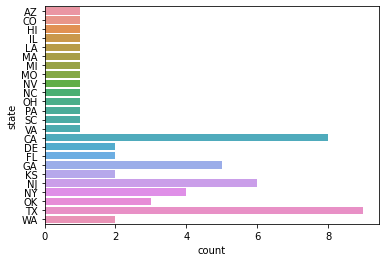

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('lady_footlocker_locations_feb_2021.csv')
sns.countplot(data = df, y ='state')
plt.show()

There are total 59 stores within 24 states in the given data. We can see with the help of plot above that the maximum number of stores are in the state TX with 9 stores followed by the state CA with 8 stores.